# Dependencies

In [16]:
#Import dependencies
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import os

# Raw Data Files

In [17]:
#Specifying Files - Sumaya/Jake
rootFolder = "raw_data"
#Get tuition data
tuition_data = os.path.join(rootFolder,"tuition_and_board_2018_inflated.csv")
#Get wage data
wages_data = os.path.join(rootFolder,"median_income.csv")
#Get loan data
loan_data = os.path.join(rootFolder,"student_aid.csv")
#Get wage gap data
wage_gaps = os.path.join(rootFolder,"wage_gap.csv")
#Get student grant data
student_grants = os.path.join(rootFolder,"grants_awarded.csv")
#Get consumer price index data
cpi = os.path.join(rootFolder,"consumer_price_index.csv")
#Get Federal loan data
fed_loan_data = os.path.join(rootFolder,"fed_rsrv_bank_std_loan_debt.csv")
#Get data for student overall Debt
student_overall_debt = os.path.join(rootFolder,"debt_by_studentswithdebt.csv")
#Get enrollment data
enrollment_data = os.path.join(rootFolder,"enrollment_statistics.csv")

# Data Frames

In [18]:
#Defining Table Frmaes - Sumaya/Jake
df_tuition = pd.read_csv(tuition_data)
df_wage_data = pd.read_csv(wages_data)
df_loan_data = pd.read_csv(loan_data)
df_wage_gaps = pd.read_csv(wage_gaps)
df_student_grants = pd.read_csv(student_grants)
df_cpi = pd.read_csv(cpi)
df_fed_loan_data = pd.read_csv(fed_loan_data)
df_student_overall_debt = pd.read_csv(student_overall_debt)
df_enroll = pd.read_csv(enrollment_data)

In [19]:
#Merging Tables-Sumaya
merge_table = pd.merge(df_tuition, df_wage_data, on = "year", how = "inner")
merge_table2 = pd.merge(merge_table, df_loan_data,on = "year", how = "inner")
merge_table3 = pd.merge(merge_table2, df_wage_gaps, on = "year", how = "inner")
merge_table4 = pd.merge(merge_table3, df_student_grants, on = "year", how = "inner")
merge_table5 = pd.merge(merge_table4, df_enroll, on = "year", how = "inner")
final_merged_table = pd.merge(merge_table5, df_cpi, on = "year", how = "inner")
final_merged_table.head()


#-----------------------------------------------------------------------------------------------------
#Federl Reserve Tables - These tables showcase students with student loans in addition to other loans like mortgage, credit card, and autoloans
#The df_fed_loan_data starts from 1990 and shows data from loan instutions. Which is comprehensive.
#The df_student_overall_debt starts from 1999 and goes by quater. The quaters need to be averaged by year.

,year,pv_np_4fr_tuition,pv_one_4yr_%change,pb_4fr_tuition,pb_one_4yr_%change,pb_two_2yr_tuition,pb2_one_2yr_%change,pv_np_4fr_tuition_bd,pv_one_4yr_%change_bd,pb_4fr_tuition_bd,...,max_2017,min_award_current,min_award_2017,num_recepients,% recipients_independent,enrollment_public_millions,enrollment_private_millions,CPI,factor_2018,factor_2017
0,1973,11660,-0.60%,2900,-0.037,1540,0.116,18320,-0.014,9100,...,2497.590790,50,276.282167,176.0,0.133,7.42,2.18,44.3,5.69,5.53
1,1974,10870,-6.80%,2600,-0.103,1430,-0.071,17450,-0.047,8420,...,5202.941296,50,247.759109,567.0,0.219,7.99,2.24,49.4,5.10,4.96
2,1975,10650,-2.00%,2510,-0.035,1160,-0.189,17110,-0.019,8280,...,6322.885609,200,903.269373,1217.0,0.298,8.83,2.35,54.2,4.65,4.52
3,1976,11170,4.90%,2740,0.092,1240,0.069,17570,0.027,8560,...,6001.758319,200,857.394046,1944.0,0.383,8.65,2.36,57.1,4.41,4.29
4,1977,11150,-0.20%,2730,-0.004,1280,0.032,17520,-0.003,8430,...,5618.039344,200,802.577049,2011.0,0.385,8.85,2.44,61.0,4.13,4.01


# Data Munging
* pv -> Private
* pb -> Public
* np -> Non profit
* bd -> room and board

In [5]:
masterTable = final_merged_table.copy() #copy final merged table
masterTable = masterTable.set_index("year") #set index to year
masterTable = masterTable.T #transpose table
masterTable

year,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
pv_np_4fr_tuition,11660,10870,10650,11170,11150,11350,11140,11030,11310,11990,...,28440,30120,30940,31100,31890,32500,33090,34150,35080,35720
pv_one_4yr_%change,-0.60%,-6.80%,-2.00%,4.90%,-0.20%,1.80%,-1.90%,-1.00%,2.50%,6.00%,...,0.40%,5.90%,2.70%,0.50%,2.50%,1.90%,1.80%,3.20%,2.70%,1.80%
pb_4fr_tuition,2900,2600,2510,2740,2730,2650,2550,2440,2500,2660,...,7560,8270,8820,9240,9510,9590,9680,9960,10130,10270
pb_one_4yr_%change,-0.037,-0.103,-0.035,0.092,-0.004,-0.029,-0.038,-0.043,0.025,0.064,...,0.009,0.094,0.067,0.048,0.029,0.008,0.009,0.029,0.017,0.014
pb_two_2yr_tuition,1540,1430,1160,1240,1280,1270,1240,1190,1180,1210,...,2730,3010,3170,3310,3460,3500,3530,3590,3620,3670
pb2_one_2yr_%change,0.116,-0.071,-0.189,0.069,0.032,-0.008,-0.024,-0.04,-0.008,0.025,...,-0.014,0.103,0.053,0.044,0.045,0.012,0.009,0.017,0.008,0.014
pv_np_4fr_tuition_bd,18320,17450,17110,17570,17520,17680,17270,17030,17410,18430,...,38720,41040,42160,42350,43390,44190,44900,46330,47490,48380
pv_one_4yr_%change_bd,-0.014,-0.047,-0.019,0.027,-0.003,0.009,-0.023,-0.014,0.022,0.059,...,0.001,0.06,0.027,0.005,0.025,0.018,0.016,0.032,0.025,0.019
pb_4fr_tuition_bd,9100,8420,8280,8560,8430,8250,8030,7770,7900,8270,...,16460,17830,18700,19140,19600,19830,20020,20660,21100,21400
pb_one_4yr_%change_bd,-0.024,-0.075,-0.017,0.034,-0.015,-0.021,-0.027,-0.032,0.017,0.047,...,0.003,0.083,0.049,0.024,0.024,0.012,0.01,0.032,0.021,0.014


# Plots

### Tuition vs Average Wage Index

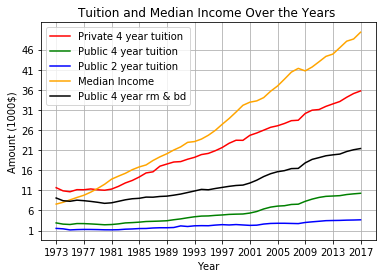

In [17]:
#plot Tuition vs Average Wage Index
plt.plot(masterTable.columns,masterTable.loc["pv_np_4fr_tuition"] / 1000, color = 'red',label = "Private 4 year tuition")
plt.plot(masterTable.columns,masterTable.loc["pb_4fr_tuition"] / 1000, color = 'green',label = "Public 4 year tuition")
plt.plot(masterTable.columns,masterTable.loc["pb_two_2yr_tuition"] / 1000, color = 'blue',label = "Public 2 year tuition")
plt.plot(masterTable.columns,masterTable.loc["average_wage_index"] / 1000,label = "Median Income", color = "orange")
plt.plot(masterTable.columns,masterTable.loc["pb_4fr_tuition_bd"] / 1000,label = "Public 4 year rm & bd", color = "black")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Amount (1000$)")
plt.xticks(np.arange(min(masterTable.columns), max(masterTable.columns)+1, 4))
plt.yticks(np.arange(1, 51, step=5))
plt.legend(loc = 'best')
plt.title("Tuition and Median Income Over the Years ")
#plt.ylim(10500,36000)
plt.show()

### Federal loans vs Average Wage Index

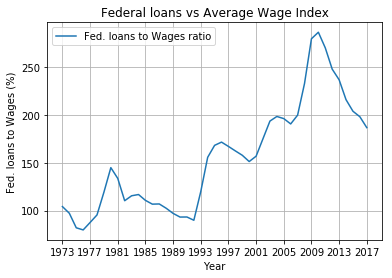

In [10]:
plt.plot(masterTable.columns,masterTable.loc["tot_fed_loans"] / masterTable.loc["average_wage_index"] * 100,\
         label = "Fed. loans to Wages ratio")
plt.xlabel("Year")
plt.ylabel("Fed. loans to Wages (%)")
plt.xticks(np.arange(min(masterTable.columns), max(masterTable.columns)+1, 4))
plt.grid()
plt.legend(loc = 'best')
plt.title("Federal loans vs Average Wage Index")
plt.show()

### Breakdown of Student Aid

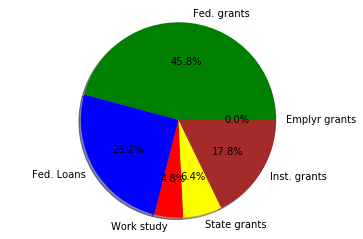

In [11]:
pieLabels = ["Fed. grants","Fed. Loans","Work study","State grants","Inst. grants","Emplyr grants"]
pieColors = ["green","blue","red","yellow","brown","pink"]
size1973 = [(masterTable.loc["tot_federal_grants",masterTable.columns[0]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ,(masterTable.loc["tot_fed_loans",masterTable.columns[0]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ,(masterTable.loc["fedral_work_study",masterTable.columns[0]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ,(masterTable.loc["state_grants",masterTable.columns[0]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ,(masterTable.loc["institutional_grants",masterTable.columns[0]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ,(masterTable.loc["private_employer_grants",masterTable.columns[0]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ]                                                                                                                                                              
                    
plt.pie(size1973,labels = pieLabels, colors = pieColors,autopct = '%1.1f%%',shadow = True)
plt.axis("equal")
plt.show()

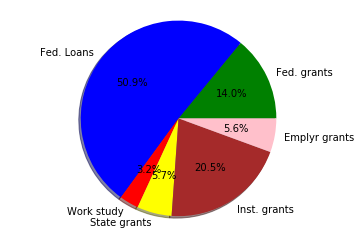

In [12]:
size1995 = [(masterTable.loc["tot_federal_grants",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ,(masterTable.loc["tot_fed_loans",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ,(masterTable.loc["fedral_work_study",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ,(masterTable.loc["state_grants",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ,(masterTable.loc["institutional_grants",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ,(masterTable.loc["private_employer_grants",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ]                                                                                                                                                              
                    
plt.pie(size1995,labels = pieLabels, colors = pieColors,autopct = '%1.1f%%',shadow = True)
plt.axis("equal")
plt.show()

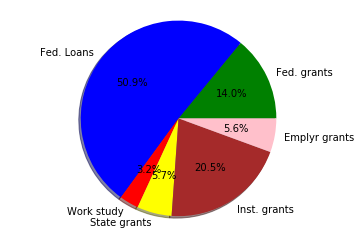

In [13]:
size1995 = [(masterTable.loc["tot_federal_grants",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ,(masterTable.loc["tot_fed_loans",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ,(masterTable.loc["fedral_work_study",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ,(masterTable.loc["state_grants",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ,(masterTable.loc["institutional_grants",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ,(masterTable.loc["private_employer_grants",masterTable.columns[22]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[22]]* 100)\
           ]                                                                                                                                                              
                    
plt.pie(size1995,labels = pieLabels, colors = pieColors,autopct = '%1.1f%%',shadow = True)
plt.axis("equal")
plt.show()

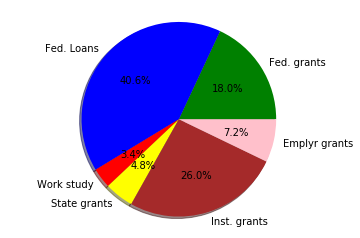

In [14]:
size2017 = [(masterTable.loc["tot_federal_grants",masterTable.columns[44]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[44]]* 100)\
           ,(masterTable.loc["tot_fed_loans",masterTable.columns[44]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[44]]* 100)\
           ,(masterTable.loc["fedral_work_study",masterTable.columns[44]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[0]]* 100)\
           ,(masterTable.loc["state_grants",masterTable.columns[44]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[44]]* 100)\
           ,(masterTable.loc["institutional_grants",masterTable.columns[44]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[44]]* 100)\
           ,(masterTable.loc["private_employer_grants",masterTable.columns[44]] /masterTable.loc["tot_std_aid_loans",masterTable.columns[44]]* 100)\
           ]                                                                                                                                                              
                    
plt.pie(size2017,labels = pieLabels, colors = pieColors,autopct = '%1.1f%%',shadow = True)
plt.axis("equal")
plt.show()

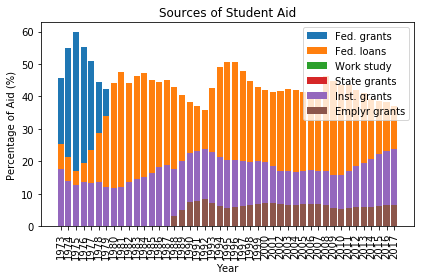

In [15]:
p1 = plt.bar(masterTable.columns,masterTable.loc["tot_federal_grants"] / masterTable.loc["tot_std_aid_loans"] *100)
p2 = plt.bar(masterTable.columns,masterTable.loc["tot_fed_loans"] / masterTable.loc["tot_std_aid_loans"] *100)
p3 = plt.bar(masterTable.columns,masterTable.loc["fedral_work_study"] / masterTable.loc["tot_std_aid_loans"] *100)
p4 = plt.bar(masterTable.columns,masterTable.loc["state_grants"] / masterTable.loc["tot_std_aid_loans"] *100)
p5 = plt.bar(masterTable.columns,masterTable.loc["institutional_grants"] / masterTable.loc["tot_std_aid_loans"] *100)
p6 = plt.bar(masterTable.columns,masterTable.loc["private_employer_grants"] / masterTable.loc["tot_std_aid_loans"] *100)
plt.title("Sources of Student Aid")
plt.ylabel("Percentage of Aid (%)")
plt.xlabel("Year")
plt.xticks(masterTable.columns,rotation="vertical")
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0]),("Fed. grants","Fed. loans","Work study","State grants","Inst. grants","Emplyr grants"))
plt.tight_layout()
plt.show()

In [35]:
plt.bar?

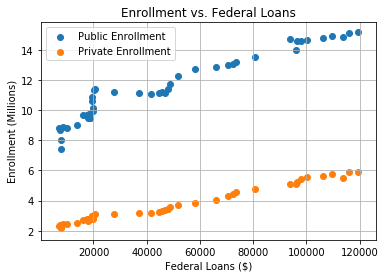

In [23]:
#federal loans and enrollment
#loans x, enrollment y
plt.scatter(masterTable.loc["tot_fed_loans"],masterTable.loc["enrollment_public_millions"],
         label = "Public Enrollment")
plt.scatter(masterTable.loc["tot_fed_loans"],masterTable.loc["enrollment_private_millions"],
         label = "Private Enrollment")
plt.xlabel("Federal Loans ($)")
plt.ylabel("Enrollment (Millions)")
#plt.xticks(np.arange(min(masterTable.columns), max(masterTable.columns)+1, 4))
plt.grid()
plt.legend(loc = 'best')
plt.title("Enrollment vs. Federal Loans")
plt.show()

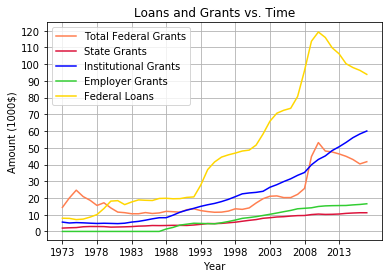

In [55]:
#line graph of loans and grants vs time

#federal grants, er grants,inst grants, state grants

plt.plot(masterTable.columns,masterTable.loc["tot_federal_grants"] / 1000, color = 'coral',label = "Total Federal Grants")
plt.plot(masterTable.columns,masterTable.loc["state_grants"] / 1000, color = 'crimson',label = "State Grants")
plt.plot(masterTable.columns,masterTable.loc["institutional_grants"] / 1000, color = 'blue',label = "Institutional Grants")
plt.plot(masterTable.columns,masterTable.loc["private_employer_grants"] / 1000,label = "Employer Grants", color = "limegreen")
plt.plot(masterTable.columns,masterTable.loc["tot_fed_loans"] / 1000,label = "Federal Loans", color = "gold")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Amount (1000$)")
plt.xticks(np.arange(min(masterTable.columns), max(masterTable.columns)+1,5))
plt.yticks(np.arange(0, 150, step=10))
plt.legend(loc = 'best')
plt.title("Loans and Grants vs. Time")
plt.ylim(-5,125)
plt.show()